# DEEP LEARNING: NLP E ANÁLISE DE SENTIMENTOS

A utilização  de  modelos  de  aprendizado  profundo(Deep  Learning) para problemas de processamento de linguagem natural teve grande avanço nos últimos anos.

NLP (Natural Language Processing) é a área da ciência de dados que projeta algoritmos capazes de:

- entender textos,

- extrair informações,

- classificar sentimentos,

- responder perguntas,

- e até gerar novos textos.

É o encontro do mundo humano (linguagem) com o mundo computacional (números).

**O grande desafio: computadores não entendem palavras**

Para o computador, texto cru é apenas:

"filme excelente"  -> ???  
"péssimo, perdi meu tempo" -> ???  

Ele não entende sentimentos, ironia, contexto.

Precisamos converter texto em números. **Esse é o coração do NLP.**

**Etapas de pré-processamento de texto**

- Deixar tudo minúsculo

- Remover pontuação

- Tirar stopwords (“o”, “a”, “de”, “um”...)

- Tokenização (quebrar texto em palavras):
]

"gostei muito do filme" → ["gostei", "muito", "do", "filme"]

**Transformar palavras em números**

Existem vários métodos:

**Bag of Words**

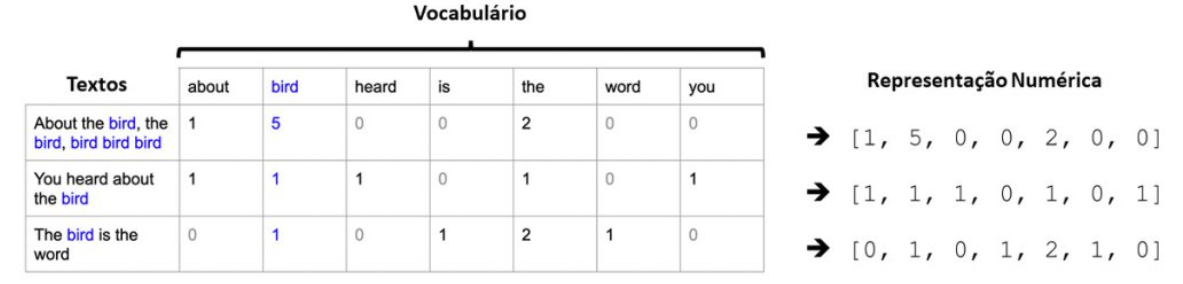

**Embeddings**

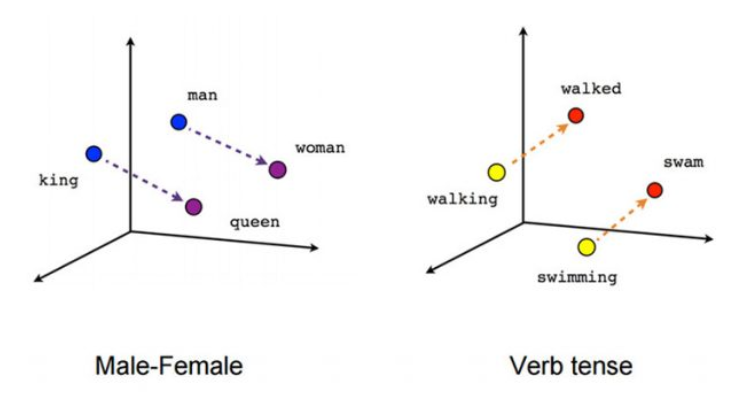

# Análise de Sentimentos: Comentários de Filmes

**Nosso Obejtivo é receber um texto (uma crítica de filme) e prever automaticamente se ele expressa um sentimento positivo ou negativo**


Neste projeto utilizaremos o dataset do IMDb Reviews, um conjunto de dados amplamente usado em tarefas de Natural Language Processing (NLP).

https://www.kaggle.com/datasets/harshit264/imdb-reviews

Esse dataset contém 50.000 críticas de filmes escritas por usuários do site IMDb.
As críticas já vêm rotuladas como:

1 → Sentimento positivo

0 → Sentimento negativo

A base está dividida de forma equilibrada entre treinamento e teste, garantindo a mesma proporção de avaliações positivas e negativas em cada conjunto.

In [ ]:
#Importação de bibliotecas
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [ ]:
#CRIAÇÃO DE VARIAVEIS
BUFFER_SIZE = 10000 #DEFINIÇÃO DE PALAVRAS UTILIZADAS PARA REALIZAR O EMBARALHAMENTO
BATCH_SIZE = 64 #REPRESENTA QUANTAS PALAVRAS SERÃO UTILIZADAS POR VEZ DURANTE O PROCESSAMENTO
VOCAB_SIZE = 1000 #DETERMINAÇÃO DO TAMANHO DO VOCABULÁRIO

In [ ]:
#CARREGAMENTO DA BASE DE DADOS / DATASET
dataset, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.3RZ2RT_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.3RZ2RT_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.3RZ2RT_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_e

In [ ]:
#SEPARANDO EM TREINO E TESTE
treinods, testeds = dataset['train'], dataset['test']

In [ ]:
#VISUALIZANDO O TREINO
for texto, rotulo in treinods.take(10):
  texto_decodificado = texto.numpy().decode('utf-8')
  rotulo_valor = rotulo.numpy()
  print('Texto:', texto_decodificado)
  print('Rotulo:', rotulo_valor)
  print('-'*60)

Texto: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Rotulo: 0
------------------------------------------------------------
Texto: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on th

In [ ]:
#EMBARALHAMENTO DOS DADOS
#BARRA INVERTIDA UTILIZADA PARA QUEBRAR PARA A PRÓXIMA LINHA
treinods = treinods.shuffle(BUFFER_SIZE) \
                   .batch(BATCH_SIZE) \
                   .prefetch(tf.data.AUTOTUNE)
testeds = testeds.batch(BATCH_SIZE) \
                 .prefetch(tf.data.AUTOTUNE)

In [ ]:
#PRÉ-PROCESSAMENTO DO TEXTO (TÉCNICA DE VETORIZAÇÃO)
encoder = tf.keras.layers.TextVectorization(
                          max_tokens = VOCAB_SIZE,
                          output_mode = 'int',
                          output_sequence_length = None)
encoder.adapt(treinods.map(lambda text, rotulo:text))

In [ ]:
#VISUALIZANDO O VOCABULÁRIO
vocab = encoder.get_vocabulary()
print('As primeiras 20 palavras do vocabulário:')
print(vocab[:20])

As primeiras 20 palavras do vocabulário:
['', '[UNK]', np.str_('the'), np.str_('and'), np.str_('a'), np.str_('of'), np.str_('to'), np.str_('is'), np.str_('in'), np.str_('it'), np.str_('i'), np.str_('this'), np.str_('that'), np.str_('br'), np.str_('was'), np.str_('as'), np.str_('for'), np.str_('with'), np.str_('movie'), np.str_('but')]


In [ ]:
#ANÁLISE DE SENTIMENTO / CRIAÇÃO DO MODELO
modelo = tf.keras.Sequential([
                      encoder,
                      tf.keras.layers.Embedding(
                          input_dim = len(encoder.get_vocabulary()),
                          output_dim = 64,
                          mask_zero = True
                      ),
                      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                      tf.keras.layers.Dense(64, activation = 'relu'),
                      tf.keras.layers.Dense(1)
])

In [ ]:
#COMPILANDO O MODELO
modelo.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(1e-4),
    metrics = ['accuracy']
)

In [ ]:
#TREINAMENTO DO MODELO
history = modelo.fit(
    treinods,
    epochs = 2,
    validation_data = testeds,
    validation_steps = 30
)